In [32]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
mu.update('dhlab_v2', silent = True)
import pandas as pd
import dhlab_v2 as d2

In [33]:
mu.css('css.css')

In [34]:
%%HTML
p {
    font-size:1.4em;
}

In [35]:
def show_communities(G, size = 10):
    Gc = gnl.community_dict(G)
    for c in Gc:
        out = "**{name}**: {group}".format(name = c, group = ', '.join(Gc[c][:size]))
        mu.printmd(out)
              

# DH-lab - Nasjonalbiblioteket

DH - Digital Humanioria: tolkning og analyse av tekst, bilder og audio

Team fra språkbanken
* Lars
* Yngvil
* Magnus
* Andre
* Ingerid



https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

In [59]:
corpus = d2.document_corpus( from_year = 1960, to_year = 1990, limit = 5000, lang = 'nob')

# Kollokasjonsanalyse

Hva er assosiert med hva? Hvilke ord er relevant?

In [72]:
coll_i = d2.urn_collocation(list(corpus.urn), word= 'dit', after = 0, before = 10 )

In [73]:
coll_på = d2.urn_collocation(list(corpus.urn), word= 'hit', after = 0, before = 10 )

In [74]:
coll_i.sort_values(by = 'bdist').head(20)

,counts,dist,bdist
Værg,43,43,1.400000
kommet,525,862,1.673624
flyttet,443,733,1.692135
dra,458,766,1.708696
tolkes,31,39,1.787879
komme,944,1696,1.813953
flytta,35,52,1.945946
søkte,44,73,2.021739
kom,1438,2933,2.050694
reise,287,579,2.072664


In [75]:
coll_i.loc['kjelleren']

counts    10.000000
dist      54.000000
bdist      6.166667
Name: kjelleren, dtype: float64

In [76]:
coll_på.sort_values(by = 'bdist').head(20)

,counts,dist,bdist
kommet,1083,1427,1.333641
Kom,930,1310,1.427039
komme,1588,2328,1.476730
flyttet,367,594,1.663957
kom,3093,5331,1.728918
tilbake,618,1172,1.922581
nådd,18,19,1.950000
slengt,17,18,2.000000
turen,38,63,2.075000
kommer,1356,2847,2.111193


In [38]:
pd.DataFrame((coll.counts/tot.freq).sort_values(ascending = False)).head(10)

,0
DEK,0.002347
ANT,0.001375
Nitelva,0.001260
STR,0.000852
bestandet,0.000727
SRS,0.000646
Brim,0.000645
Kineseren,0.000595
helårsdrift,0.000584
G.I,0.000524


In [38]:
pd.DataFrame((coll.counts/tot.freq).sort_values(ascending = False)).head(10)

,0
DEK,0.002347
ANT,0.001375
Nitelva,0.001260
STR,0.000852
bestandet,0.000727
SRS,0.000646
Brim,0.000645
Kineseren,0.000595
helårsdrift,0.000584
G.I,0.000524


# Hvordan forholder ordene seg til hverandre? 

In [19]:
agg = d2.get_document_frequencies(list(corpus.urn))

In [22]:
dtm = agg

In [28]:
ags = pd.DataFrame(agg.transpose().sum(), columns = ['counts'])

In [29]:
ags.head()

,counts
.,172678.0
",",126754.0
og,53499.0
i,56077.0
er,15978.0


In [31]:
assoc = pd.DataFrame((ags.counts/ags.counts.sum())/(tot.freq/tot.freq.sum()), columns =  ['relevans']).sort_values(by = 'relevans', ascending = False)
assoc.head(20)

,relevans
l.pr,8805.393667
s.pr,2774.308988
langr,1820.880359
Sklett,622.797297
jun.,622.441476
Brauten,504.744966
komb,485.498149
p1,458.980183
skiløping,411.407387
DR,392.195361


In [11]:
words = list(assoc[assoc.relevans > 20].index)

In [12]:
dtm = pd.concat([nb.frame(nb.get_freq(u, top = 0, cutoff = 0), str(u)) for u in nb.pure_urn(corpus)[:20]], axis = 1)

In [14]:
dtm_key = pd.concat([((dtm[x]/dtm[x].sum())/(tot.freq/tot.freq.sum())).sort_values(ascending=False).head(150) for x in dtm], axis = 1)

In [15]:
dtm_key.columns = dtm.columns

# Bygge en dokument-term-matrise  

In [16]:
dtm_key.sort_values(by=dtm_key.columns[10], ascending = False).head(10).fillna(0).style.background_gradient(axis = 1)

,2014032408147,2011011406074,2007070401059,2014111208072,2015051108085,2009031900012,2014072305073,2012120305090,2016012008126,2006110300038,2013102906046,2016020808152,2007071900082,2016012008134,2007060801022,2016012008131,2016011248041,2009062601014,2012112808106,2012110706110
Ruuds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4699.792294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Wahlberg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4563.604916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hopprennet,0.000000,0.000000,328.106272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3211.654512,0.000000,0.000000,0.000000,0.000000,0.000000,570.302089,0.000000,660.208536,0.000000
Birgers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2862.044739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nedslaget,0.000000,0.000000,844.998125,0.000000,758.336054,0.000000,0.000000,0.000000,0.000000,0.000000,1861.026476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
hoppere,0.000000,0.000000,578.043303,1421.088947,2161.499263,0.000000,0.000000,0.000000,0.000000,0.000000,1768.172714,0.000000,0.000000,0.000000,0.000000,1637.384851,602.839991,0.000000,0.000000,0.000000
gullfuglen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1622.131760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,592.810538,0.000000
Ruud,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1572.948597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rennet,0.000000,0.000000,416.337876,1151.487776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1528.239702,0.000000,0.000000,0.000000,206.827671,0.000000,868.395567,0.000000,418.873156,0.000000
vinterleker,0.000000,0.000000,224.045674,1032.758366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1439.196741,0.000000,0.000000,0.000000,0.000000,0.000000,408.899229,0.000000,676.229985,0.000000


In [17]:
graph = dtm_key.fillna(0).dot(dtm_key.fillna(0).transpose())

# Grafanalyse av DTM 

Her gjøres det lokalt

In [19]:
import networkx as nx
G = nx.from_pandas_adjacency(graph)

In [20]:
import dhlab.graph_networkx_louvain as gnl

In [27]:
Gf = nx.from_edgelist([(u,v, e) for u,v,e in G.edges(data=True) if e['weight'] > 1000000])

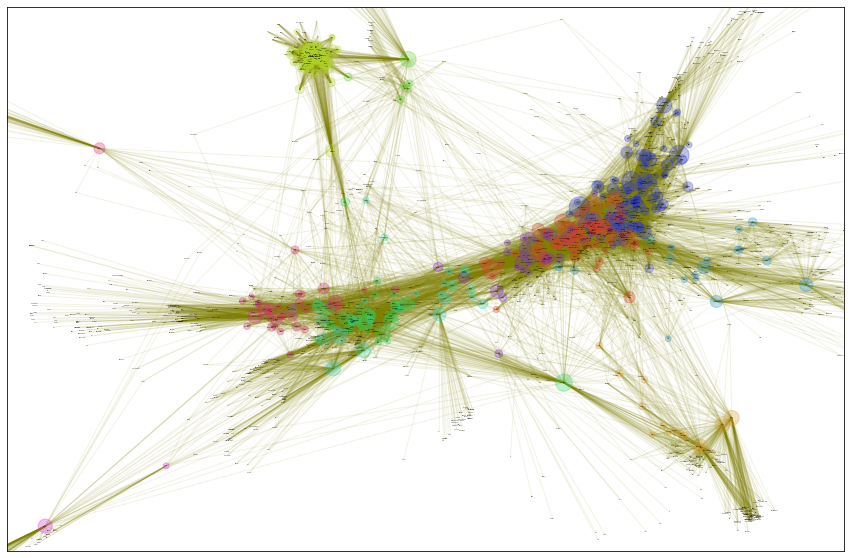

In [28]:
gnl.show_graph(Gf, spread = 0.2, fontsize = 1)

In [50]:
show_communities(Gf)

**OSK-Seiersten**: OSK, Seiersten, 42.7, 41.6, 43.3, 42.8, 42.6, 43.4, Davos, Jårvinen

**Kees-skøyting**: Kees, skøyting, Jaap, Schenk, skøytesporten, Ard, sprinten, rulleski, verdensmesterskapet, distansene

**smøringen-langrennet**: smøringen, langrennet, Chamonix, Grøttumsbråten, Haugs, norgesmesterskapet, Thorleif, startnummer, Skiforbundet, premieutdelingen

**hopprennet-Ruuds**: hopprennet, Ruuds, Wahlberg, Olympiaden, Birgers, Rennet, Placid, vinterleker, nedslaget, frasparket

**LM-klubbleder**: LM, klubbleder, idrettsaktivitet, skøyteløpere, årskull, debutalder, Skaset, resultatlistene, intervjudata, idrettslig

**bakkens-skien**: bakkens, skien, kanting, skrens, pere, instruktørens, snøforholdene, skiene, Alpin, alpint

**kroppstyngden-hurtigløp**: kroppstyngden, hurtigløp, skøyten, Løperne, bakut, starteren, feilretting, løpere, Løperen, muskelbruk

**landsrenn-Sør-Østerdal**: landsrenn, Sør-Østerdal, Skikrets, Skiklub, Brenden, Klammer, Birkebeinerrennet, bakkerekord, rennene, Renolen

**skihopping-hoppski**: skihopping, hoppski, hoppere, Stensaasen, rendene, hoppkanten, aerodynamiske, unnarennet, treningsformer, Fh

**snøens-Fiolett**: snøens, Fiolett, klister, fraspark, krystallene, snøkrystaller, skiutstyr, smøring, sålen, snødekket